In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def train(X_train, y_train):
    # do nothing
    return

def predict(X_train, y_train, x_test, k):
    # create list for distances and targets
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(x_test - X_train[i, :]))), i])

    # sort the list
    distances = sorted(distances)

    # make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

def k_nearest_neighbor(X_train, y_train, X_test, k):
    # check if k larger than n
    assert k <= len(X_train), "[!] k can't be larger than number of samples."

    # train on the input data
    train(X_train, y_train)
    
    # loop over all observations
    predictions = []

    # predict for each testing observation
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))
    
    return np.asarray(predictions)

In [4]:
train_data = pd.read_excel("C:/Users/kxj133/Downloads/task_9_5/Example_DT_conti.xlsx")

train_data.columns = ['col1','col2','target']

In [5]:
X_train = train_data[['col1','col2']].values
y_train = train_data['target'].values

In [6]:
X_test = pd.DataFrame(columns = ['col1','col2'])
X_test['col1'] = np.random.randint(low =1,high = 100,size =10000)
X_test['col2'] = np.random.randint(low =1,high = 100,size =10000)

X_test = X_test.values

In [7]:
predictions = k_nearest_neighbor(X_train, y_train, X_test, k=5)

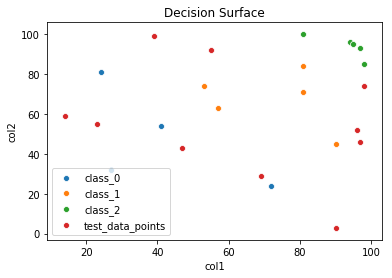

In [8]:

sns.scatterplot(x = train_data[train_data['target'] == 0]['col1'],
                y = train_data[train_data['target'] == 0]['col2'],
                label='class_0')

sns.scatterplot(x = train_data[train_data['target'] == 1]['col1'],
                y = train_data[train_data['target'] == 1]['col2'],
                label='class_1')

sns.scatterplot(x = train_data[train_data['target'] == 2]['col1'],
                y = train_data[train_data['target'] == 2]['col2'],
                label='class_2')

sns.scatterplot(x = X_test[0:10,0],
                y = X_test[0:10,1],
                label='test_data_points')

plt.title("Decision Surface")


plt.xlabel('col1')
plt.ylabel('col2')
plt.show()